In [1]:
import pandas as pd
import numpy as np
import random
distances_df = pd.read_csv('data/distanceslonglat.csv')

In [2]:
cities = distances_df['Start'].unique()
np.random.shuffle(cities)

In [3]:
def all_cities_visited_simulation(start, distances_df):
    total_distance = 0
    visited = set()
    order = []

    while len(visited) < len(distances_df):
        start_list = distances_df.loc[distances_df['Start'] == start]
        start_list = start_list.loc[start_list['Target'].isin(visited) == False]
        route_list = start_list.nsmallest(2, 'Distance')

        if len(route_list) > 1:
            route = route_list.iloc[1]
        elif len(route_list) == 1:
            route = route_list.iloc[0]

        if route['Target'] in visited:
            break
        else:
            total_distance += route['Distance']
            start = route['Target']
            visited.add(route['Start'])
            order.append(route['Start'])


    
    return total_distance, order

In [4]:
from tqdm import tqdm
simulations = []
for city in tqdm(cities):
    total_distance, order = all_cities_visited_simulation(city, distances_df)
    simulations.append({
        'distance': total_distance,
        'order': order
    })

100%|██████████| 120/120 [00:22<00:00,  5.44it/s]


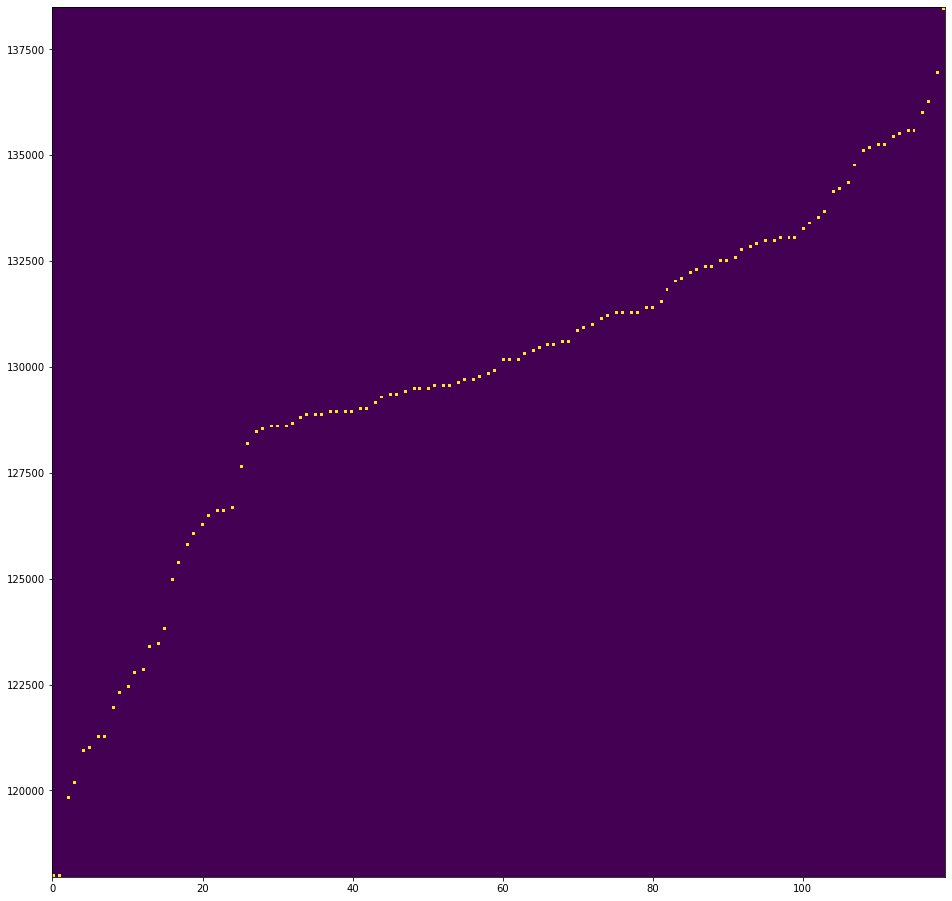

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
simulations = sorted(simulations, key=lambda x: x['distance'], reverse=False)
plt.hist2d(range(len(simulations)), [d['distance'] for d in simulations], bins=(300, 300))
plt.show()

In [7]:
def tot_dist(cities, cities_dict):
    total_distance = 0
    start = None
    target = None
    
    for city in cities:
        if not (start):
            start = city
            continue
     
        target = city
        total_distance += cities_dict[start + target]
        start = target
        target = None
    return total_distance



In [8]:
cities = ['Tripoli, Libya', 'Naples, Italy', 'Rome, Italy', 'Venice, Italy', 'Milan, Italy', 'Zrich, Switzerland', 'Munich, Germany', 'Prague, Czech Republic', 'Vienna, Austria', 'Budapest, Hungary', 'Belgrade, Serbia', 'Sofia, Bulgaria', 'Bucharest, Romania', 'Odessa, Ukraine', 'Ankara, Turkey', 'Athens, Greece', 'Cairo, Egypt', 'Mecca, Saudi Arabia', 'Djibouti, Djibouti', 'Nairobi, Kenya', 'Tananarive, Madagascar', 'Durban, South Africa', 'Johannesburg, South Africa', 'Cape Town, South Africa', 'Kinshasa, Congo', 'Dakar, Senegal', 'Lisbon, Portugal', 'Madrid, Spain', 'Barcelona, Spain', 'Marseilles, France', 'Lyons, France', 'Paris, France', 'Brussels, Belgium', 'Amsterdam, Netherlands', 'Bremen, Germany', 'Hamburg, Germany', 'Berlin, Germany', 'Copenhagen, Denmark', 'Oslo, Norway', 'Stockholm, Sweden', 'Helsinki, Finland', 'St. Petersburg, Russia', 'Moscow, Russia', 'Warsaw, Poland', 'Frankfurt, Germany', 'London, England', 'Birmingham, England', 'Bristol, England', 'Plymouth, England', 'Liverpool, England', 'Manchester, England', 'Leeds, England', 'Newcastle-on-Tyne, England', 'Edinburgh, Scotland', 'Glasgow, Scotland', 'Belfast, Northern Ireland', 'Dublin, Ireland', 'Aberdeen, Scotland', 'Reykjavk, Iceland', 'Hammerfest, Norway', 'Bordeaux, France', 'Algiers, Algeria', 'Teheran, Iran', 'New Delhi, India', 'Bombay, India', 'Calcutta, India', 'Rangoon, Myanmar', 'Bangkok, Thailand', 'Kuala Lumpur, Malaysia', 'Singapore, Singapore', 'Jakarta, Indonesia', 'Darwin, Australia', 'Port Moresby, Papua New Guinea', 'Brisbane, Australia', 'Sydney, Australia', 'Melbourne, Australia', 'Hobart, Tasmania', 'Adelaide, Australia', 'Perth, Australia', 'Manila, Philippines', 'Hong Kong, China', 'Canton, China', 'Chongqing, China', 'Nanjing (Nanking), China', 'Shanghai, China', 'Nagasaki, Japan', 'Osaka, Japan', 'Nagoya, Japan', 'Tokyo, Japan', 'Vladivostok, Russia', 'Beijing, China', 'Irkutsk, Russia', 'Chihuahua, Mexico', 'Mazatln, Mexico', 'Mexico City, Mexico', 'Veracruz, Mexico', 'Guatemala City, Guatemala', 'Havana, Cuba', 'Kingston, Jamaica', 'Panama City, Panama', 'Bogot, Colombia', 'Guayaquil, Ecuador', 'Lima, Peru', 'La Paz, Bolivia', 'Iquique, Chile', 'Crdoba, Argentina', 'Buenos Aires, Argentina', 'Montevideo, Uruguay', 'Asuncin, Paraguay', 'So Paulo, Brazil', 'Rio de Janeiro, Brazil', 'Salvador, Brazil', 'Belm, Brazil', 'Cayenne, French Guiana', 'Paramaribo, Suriname', 'Georgetown, Guyana', 'Caracas, Venezuela', 'Santiago, Chile', 'Wellington, New Zealand', 'Auckland, New Zealand']
city_distances_dict = dict(zip(distances_df['Start'] + distances_df['Target'], distances_df['Distance']))
dist = tot_dist(cities, city_distances_dict)
print(dist)

131247.79996326647


In [9]:
print(simulations[0]['order'])
print(simulations[0]['distance'])

['Wellington, New Zealand', 'Auckland, New Zealand', 'Sydney, Australia', 'Melbourne, Australia', 'Hobart, Tasmania', 'Adelaide, Australia', 'Brisbane, Australia', 'Port Moresby, Papua New Guinea', 'Darwin, Australia', 'Perth, Australia', 'Jakarta, Indonesia', 'Singapore, Singapore', 'Kuala Lumpur, Malaysia', 'Bangkok, Thailand', 'Rangoon, Myanmar', 'Calcutta, India', 'New Delhi, India', 'Bombay, India', 'Teheran, Iran', 'Ankara, Turkey', 'Odessa, Ukraine', 'Bucharest, Romania', 'Sofia, Bulgaria', 'Belgrade, Serbia', 'Budapest, Hungary', 'Vienna, Austria', 'Prague, Czech Republic', 'Berlin, Germany', 'Hamburg, Germany', 'Bremen, Germany', 'Amsterdam, Netherlands', 'Brussels, Belgium', 'Paris, France', 'London, England', 'Birmingham, England', 'Bristol, England', 'Plymouth, England', 'Liverpool, England', 'Manchester, England', 'Leeds, England', 'Newcastle-on-Tyne, England', 'Edinburgh, Scotland', 'Glasgow, Scotland', 'Belfast, Northern Ireland', 'Dublin, Ireland', 'Aberdeen, Scotland',